In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('../data/compound_features_with_scores.csv')

In [33]:
df.shape


(103, 14)

In [34]:
df.columns.tolist()



['wallet',
 'borrow_count',
 'deposit_count',
 'repay_count',
 'liquidation_count',
 'liquidates_count',
 'withdraw_count',
 'total_borrow_usd',
 'total_repay_usd',
 'total_deposit_usd',
 'total_liquidated_usd',
 'total_got_liquidated_usd',
 'active_days',
 'score']

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wallet                    103 non-null    object 
 1   borrow_count              103 non-null    int64  
 2   deposit_count             103 non-null    int64  
 3   repay_count               103 non-null    int64  
 4   liquidation_count         103 non-null    int64  
 5   liquidates_count          103 non-null    int64  
 6   withdraw_count            103 non-null    int64  
 7   total_borrow_usd          103 non-null    float64
 8   total_repay_usd           103 non-null    float64
 9   total_deposit_usd         103 non-null    float64
 10  total_liquidated_usd      103 non-null    int64  
 11  total_got_liquidated_usd  103 non-null    float64
 12  active_days               103 non-null    int64  
 13  score                     103 non-null    int64  
dtypes: float64

<Axes: >

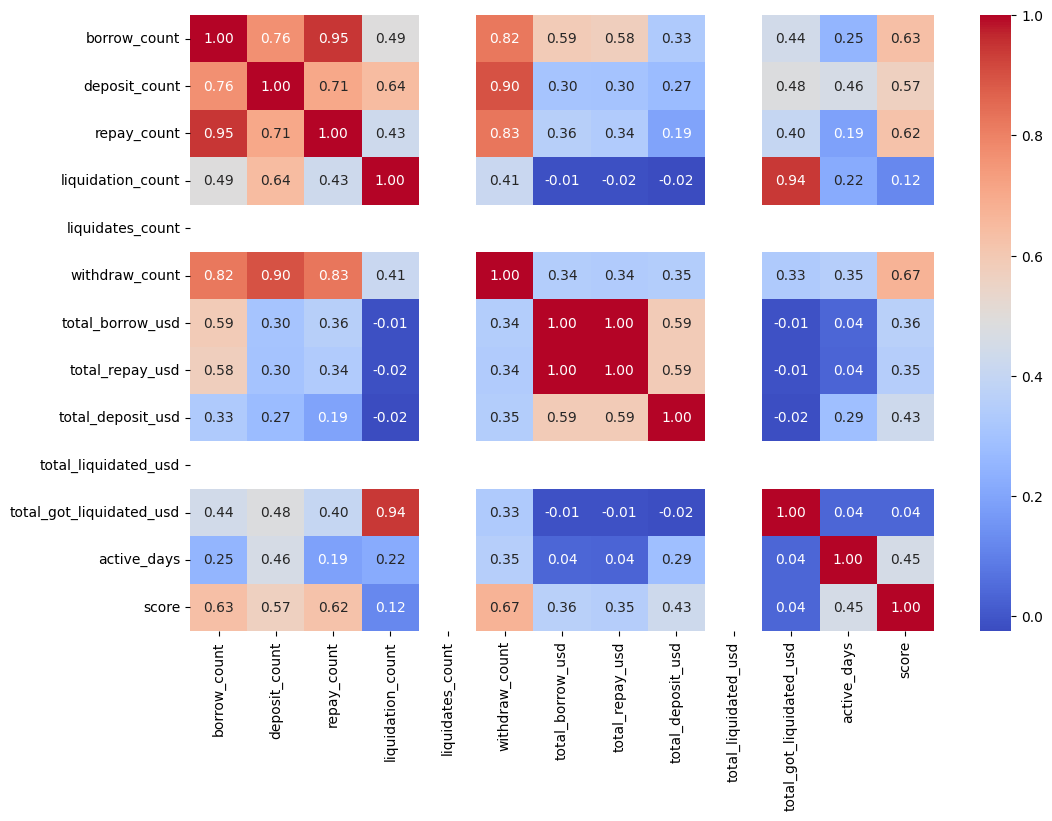

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["wallet"]).corr(), annot=True, fmt=".2f", cmap="coolwarm")


In [37]:
#liquidates count = 0 all case

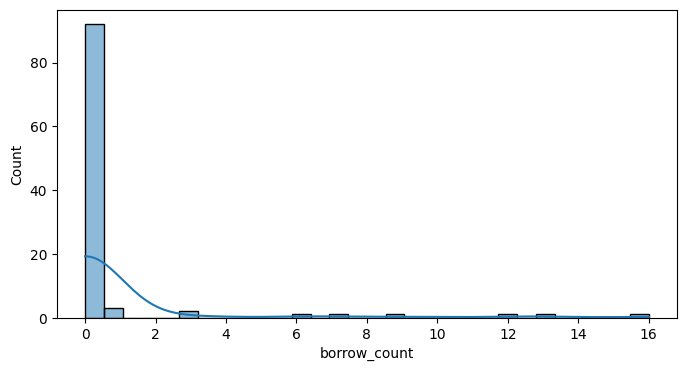

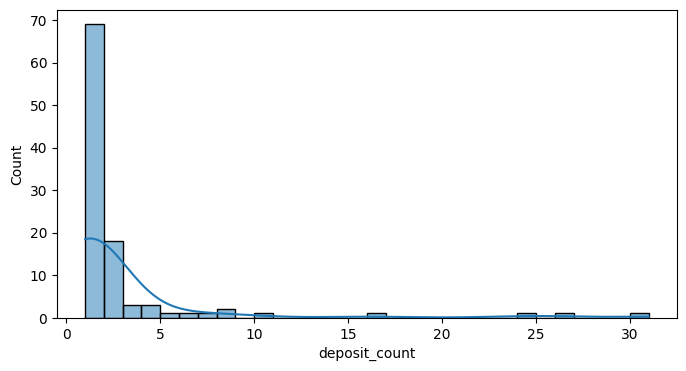

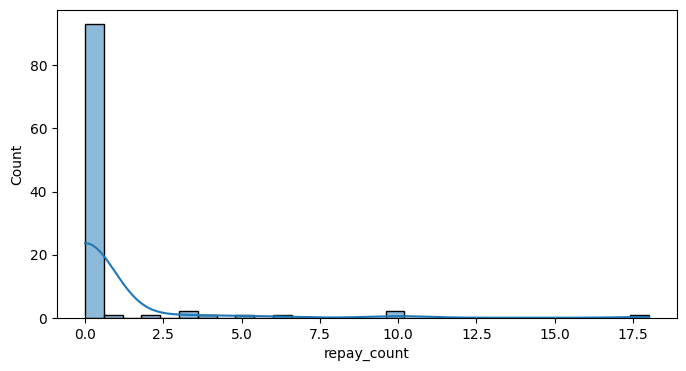

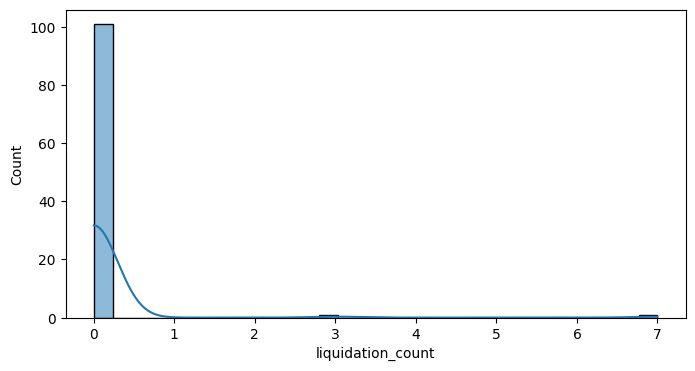

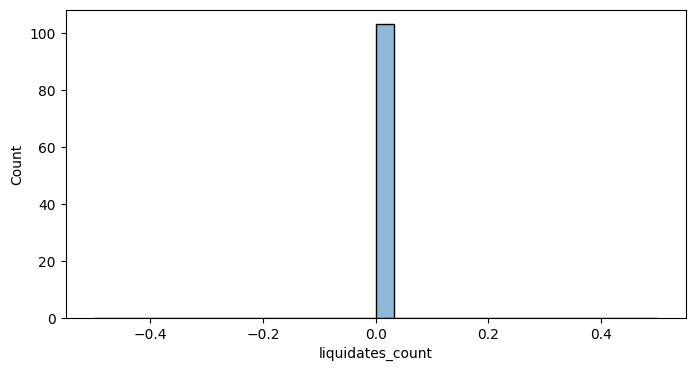

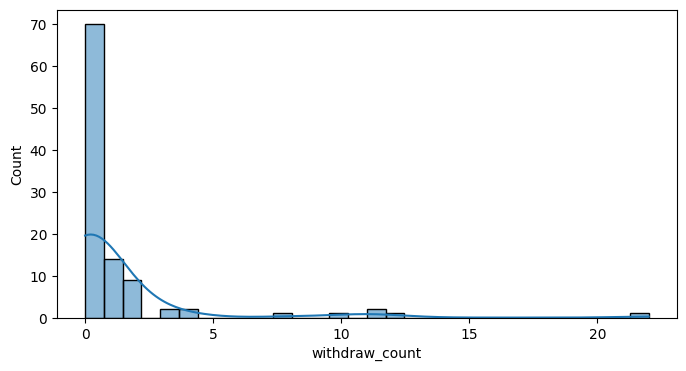

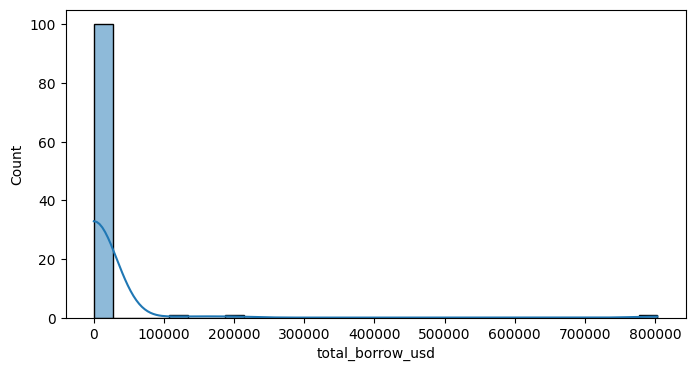

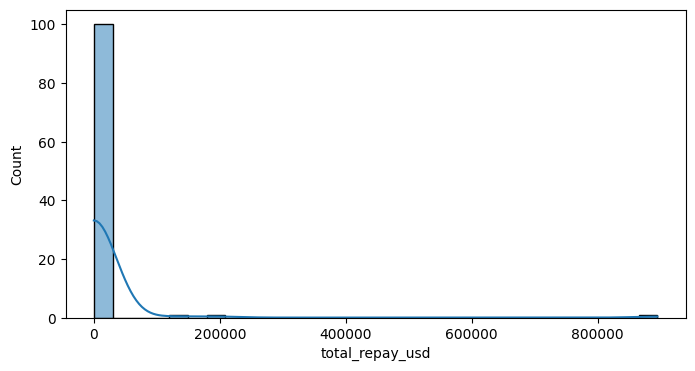

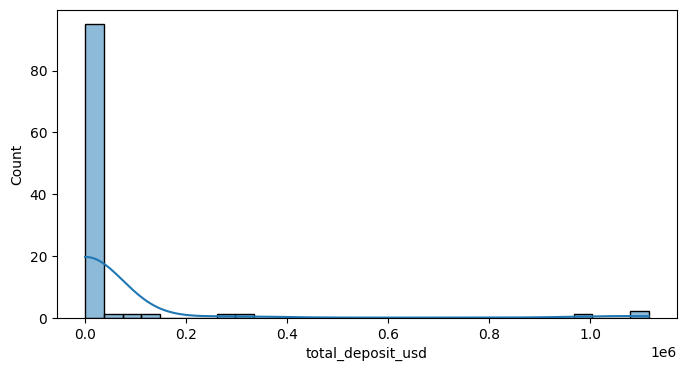

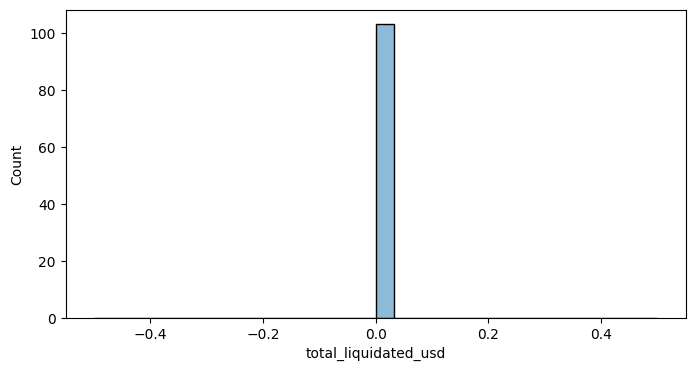

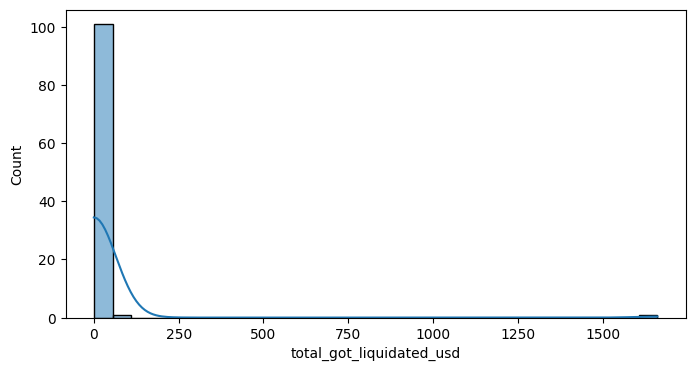

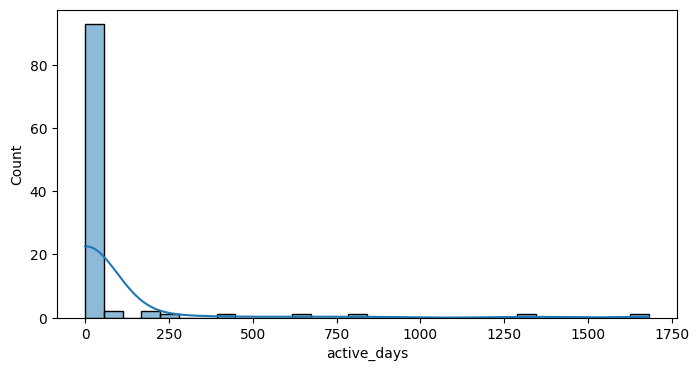

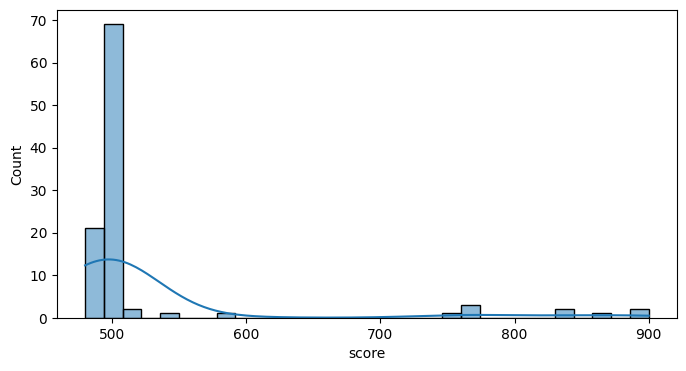

In [38]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)

In [39]:
# the data isnt diverse at all most of them lies in 500 range 

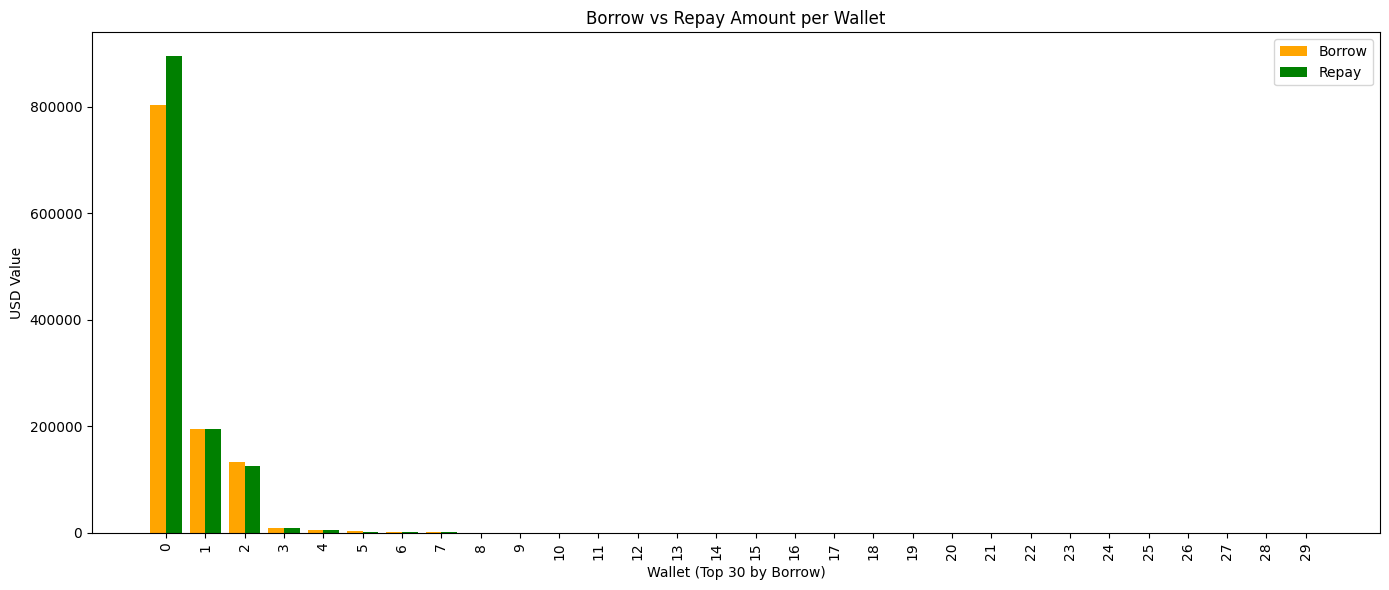

In [40]:


df_sorted = df.sort_values("total_borrow_usd", ascending=False).head(30).copy()
df_sorted = df_sorted.reset_index(drop=True) 

bar_width = 0.4
x = range(len(df_sorted))

plt.figure(figsize=(14, 6))


plt.bar([i - bar_width/2 for i in x], df_sorted["total_borrow_usd"], width=bar_width, label="Borrow", color='orange')
plt.bar([i + bar_width/2 for i in x], df_sorted["total_repay_usd"], width=bar_width, label="Repay", color='green')


plt.xlabel("Wallet (Top 30 by Borrow)")
plt.ylabel("USD Value")
plt.title("Borrow vs Repay Amount per Wallet")
plt.xticks(ticks=x, labels=[f"{i}" for i in x], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


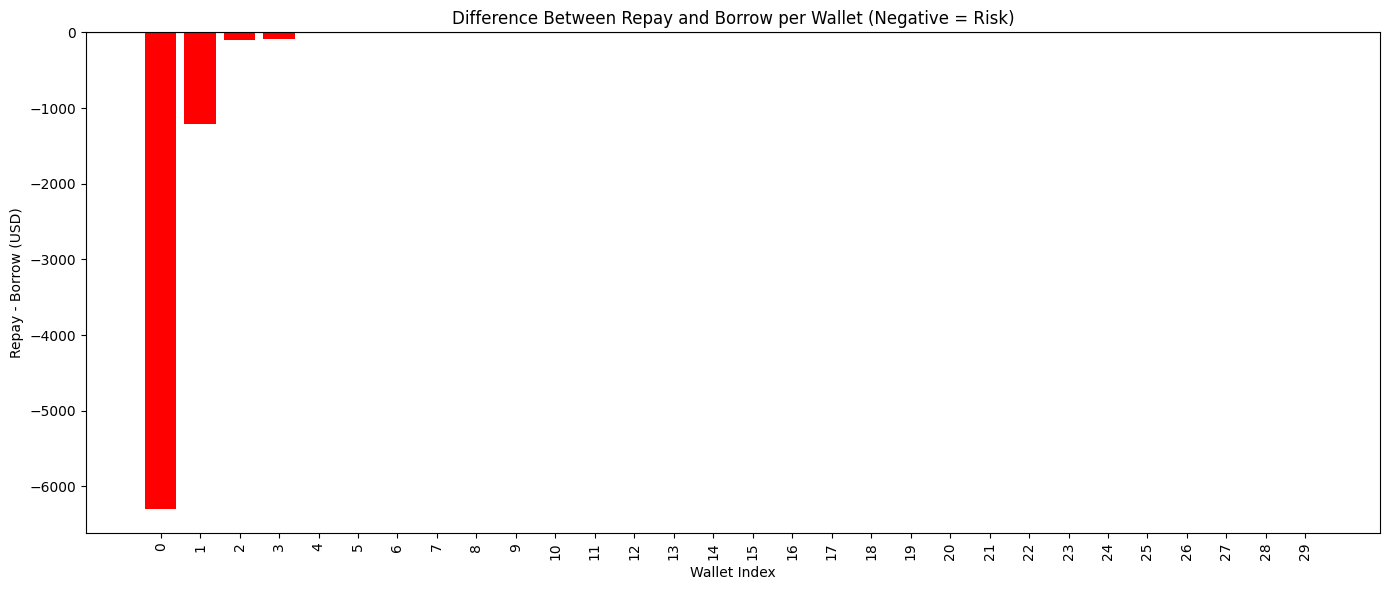

In [41]:
df["repay_minus_borrow"] = df["total_repay_usd"] - df["total_borrow_usd"]
df_diff = df.sort_values("repay_minus_borrow").head(30).reset_index(drop=True)

plt.figure(figsize=(14, 6))
colors = df_diff["repay_minus_borrow"].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar([f"{i}" for i in range(len(df_diff))], df_diff["repay_minus_borrow"], color=colors)

plt.axhline(0, color="black", linewidth=0.8)
plt.xlabel("Wallet Index")
plt.ylabel("Repay - Borrow (USD)")
plt.title("Difference Between Repay and Borrow per Wallet (Negative = Risk)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
